# Баштовий Іван


## Лабараторна робота №5 


## Варіант 18 

### Завдання : 

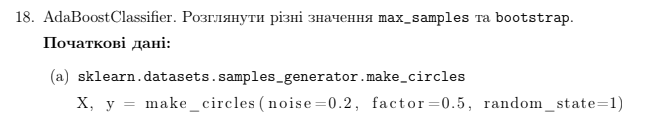

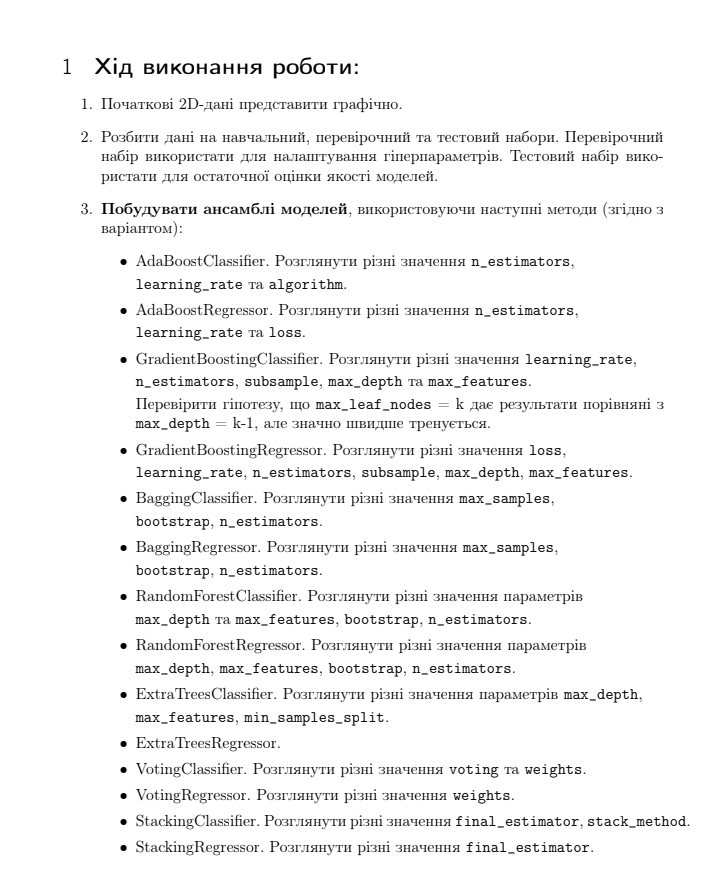

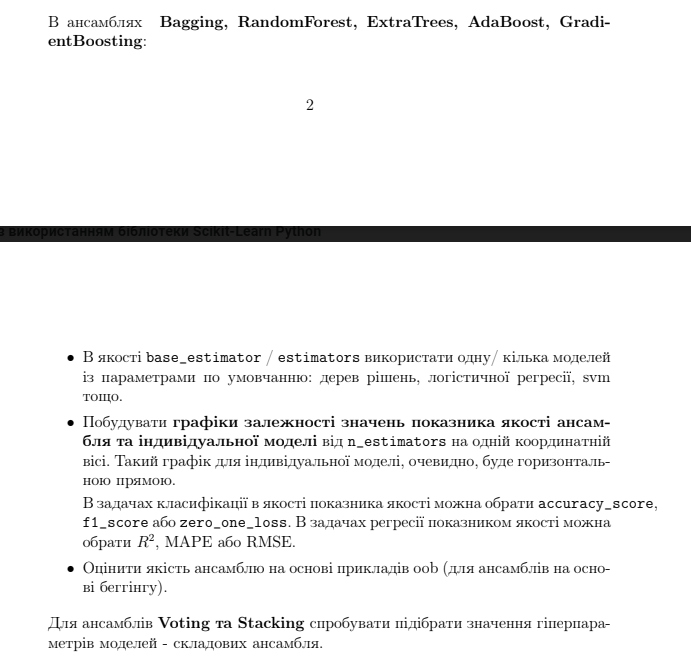

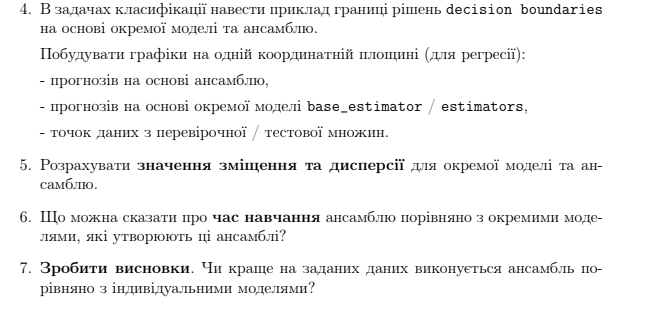

# Data Understanding


In [1]:
from sklearn.datasets import make_circles

X,y = make_circles(noise=0.2, factor=0.5, random_state=1)

In [2]:
print(f"shape of X:{X.shape}")
print(f"shape of y:{y.shape}")

shape of X:(100, 2)
shape of y:(100,)


In [3]:
X

array([[-0.38289117, -0.09084004],
       [-0.02096229, -0.47787416],
       [-0.39611596, -1.28942694],
       [-0.61813018, -0.06383715],
       [ 0.70347838, -0.18703837],
       [-0.45970463,  0.69477465],
       [-0.45091682, -0.71570524],
       [-0.45562004, -0.13406016],
       [-0.26513904,  0.40812871],
       [-0.15474648,  0.41406973],
       [ 0.231206  , -0.53275899],
       [ 0.15623875, -0.8678088 ],
       [ 0.51647541,  0.48940995],
       [ 0.68707007, -0.02334129],
       [ 0.54759869, -0.16482373],
       [-0.32179572, -0.80553536],
       [-1.07478639, -0.733362  ],
       [ 0.76758455, -0.43498783],
       [-0.47475234, -0.33813186],
       [ 0.15420656,  1.07306032],
       [ 0.65916696,  0.20773634],
       [-0.77795003,  0.1326555 ],
       [ 0.47025454, -0.31228748],
       [-0.04246799,  0.26555446],
       [-0.72405954,  0.48807185],
       [-0.36960005, -1.06514028],
       [ 0.17833327, -0.49718972],
       [-0.93927864, -0.41951638],
       [ 0.50914152,

In [4]:
y

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0])

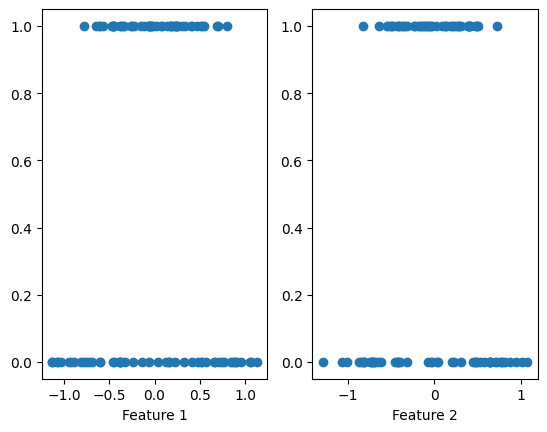

In [5]:
import matplotlib.pyplot as plt

plt.subplot(121)
plt.scatter(X[:,0], y)
plt.xlabel("Feature 1")
 
plt.subplot(122)
plt.scatter(X[:,1], y)
plt.xlabel("Feature 2")
 
plt.show()

## Let`s explore distributions of our features and target

In [6]:
import seaborn as sns

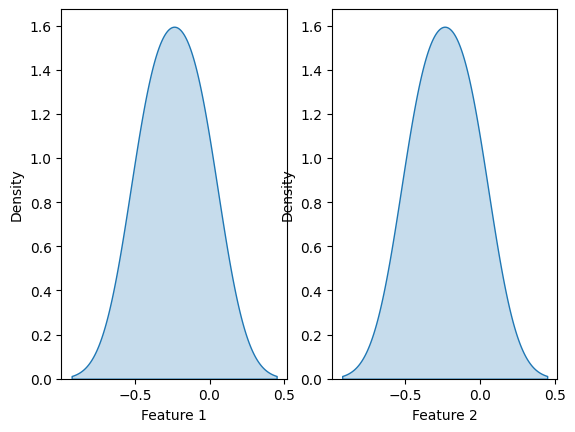

In [7]:
plt.subplot(121)
sns.kdeplot(data=X[0], fill=True)
plt.xlabel("Feature 1")
 
plt.subplot(122)
sns.kdeplot(data=X[0], fill=True)
plt.xlabel("Feature 2")

plt.show()

Text(0.5, 0, 'Target`s distribution')

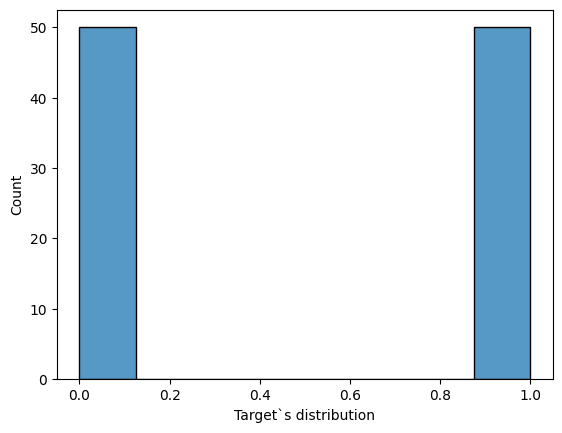

In [8]:
sns.histplot(y)
plt.xlabel('Target`s distribution')

## We see that we are dealing with binary classification with balanced classes and our features are almost normally distributed.

# Metrics

## Considering we have balanced classes we are able to use accuracy - it will not lead us to wrong interpretation of our results. 

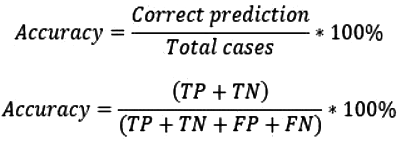

# Let`s explore AdaBoost classifier algorithm

* ## What is an AdaBoost algorithm? 
AdaBoost algorithm, short for Adaptive Boosting, is a Boosting technique used as an Ensemble Method in Machine Learning. It is called Adaptive Boosting as the weights are re-assigned to each instance, with higher weights assigned to incorrectly classified instances.
What this algorithm does is that it builds a model and gives equal weights to all the data points. It then assigns higher weights to points that are wrongly classified. Now all the points with higher weights are given more importance in the next model. It will keep training models until and unless a lower error is received.
* ## Understanding the Working of the AdaBoost Algorithm
### 1. Assigning Weights
The Image shown below is the actual representation of our dataset. Since the target column is binary, it is a classification problem. First of all, these data points will be assigned some weights. Initially, all the weights will be equal.

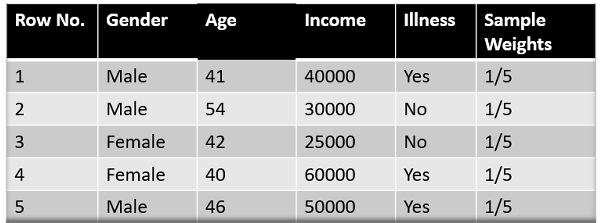

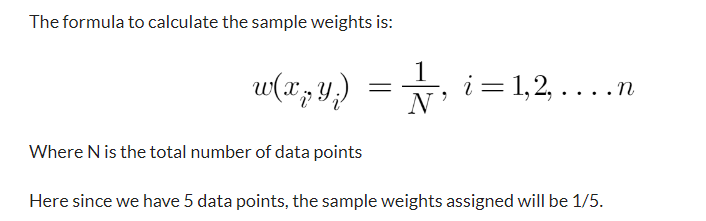

### 2. Classify the Samples

We start by seeing how well “Gender” classifies the samples and will see how the variables (Age, Income) classify the samples.
We’ll create a decision stump for each of the features and then calculate the Gini Index of each tree. The tree with the lowest Gini Index will be our first stump.
Here in our dataset, let’s say Gender has the lowest gini index, so it will be our first stump.

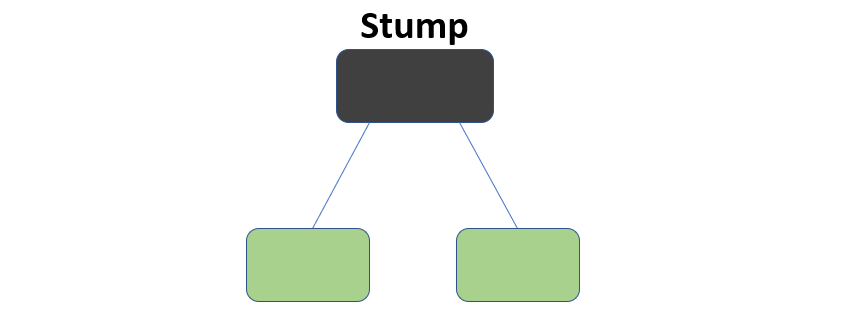

### 3. Calculate the Influence

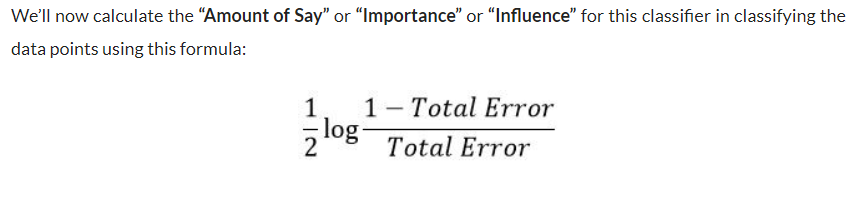

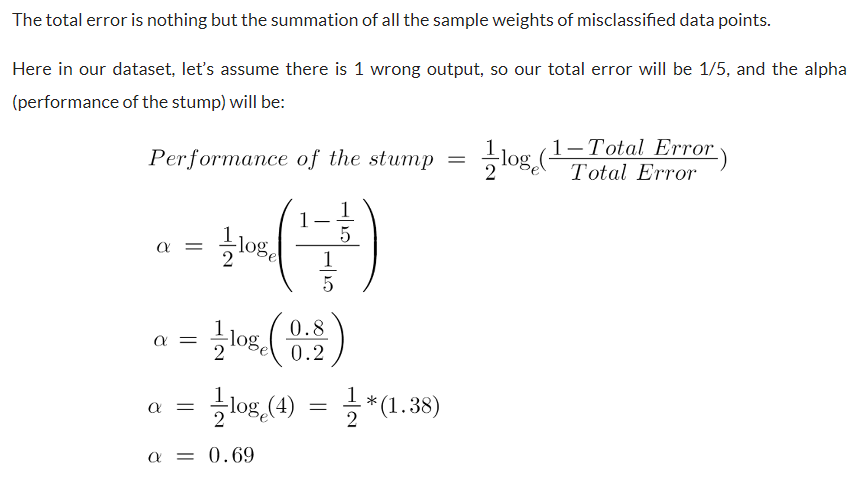

### 4.  Calculate TE and Performance

We need to update the weights because if the same weights are applied to the next model, then the output received will be the same as what was received in the first model.

The wrong predictions will be given more weight, whereas the correct predictions weights will be decreased. Now when we build our next model after updating the weights, more preference will be given to the points with higher weights.

After finding the importance of the classifier and total error, we need to finally update the weights, and for this, we use the following formula:

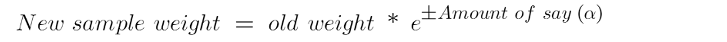

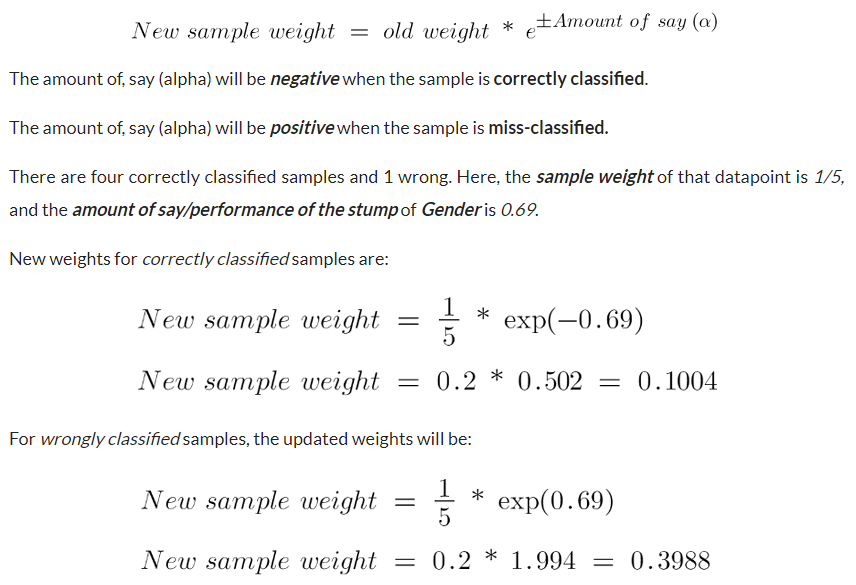

### 5. Decrease Errors

Now, we need to make a new dataset to see if the errors decreased or not. For this, we will remove the “sample weights” and “new sample weights” columns and then, based on the “new sample weights,” divide our data points into buckets.

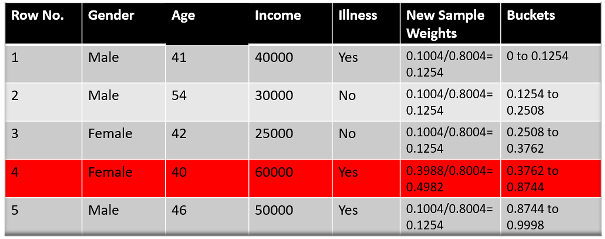

### 6. New Dataset

Now, what the algorithm does is selects random numbers from 0-1. Since incorrectly classified records have higher sample weights, the probability of selecting those records is very high.

Suppose the 5 random numbers our algorithm take is 0.38,0.26,0.98,0.40,0.55.

Now we will see where these random numbers fall in the bucket, and according to it, we’ll make our new dataset shown below.

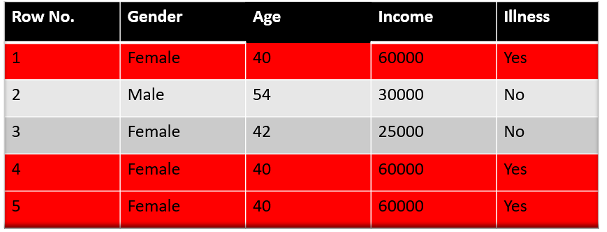

This comes out to be our new dataset, and we see the data point, which was wrongly classified, has been selected 3 times because it has a higher weight.

### 7. Repeat Previous Steps

Now this act as our new dataset, and we need to repeat all the above steps i.e.

*  Assign equal weights to all the data points.
* Find the stump that does the best job classifying the new collection of samples by finding their Gini Index and selecting the one with the lowest Gini index.
* Calculate the “Amount of Say” and “Total error” to update the previous sample weights.
*  Normalize the new sample weights.
* Iterate through these steps until and unless a low training error is achieved.

# Conclusion

*The core principle of AdaBoost is to fit a sequence of weak learners (i.e., models that are only slightly better than random guessing, such as small decision trees) on repeatedly modified versions of the data. The predictions from all of them are then combined through a weighted majority vote (or sum) to produce the final prediction. The data modifications at each so-called boosting iteration consists of applying weights to each of the training samples. Initially, those weights are all set to !
, so that the first step simply trains a weak learner on the original data. For each successive iteration, the sample weights are individually modified and the learning algorithm is reapplied to the reweighted data. At a given step, those training examples that were incorrectly predicted by the boosted model induced at the previous step have their weights increased, whereas the weights are decreased for those that were predicted correctly. As iterations proceed, examples that are difficult to predict receive ever-increasing influence. Each subsequent weak learner is thereby forced to concentrate on the examples that are missed by the previous ones in the sequence .*

Source: https://www.analyticsvidhya.com/blog/2021/09/adaboost-algorithm-a-complete-guide-for-beginners/

# Modeling 

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.inspection import DecisionBoundaryDisplay
import time

import warnings
warnings.filterwarnings("ignore")

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size = 0.2)

print(f"X_train shape = {X_train.shape}")
print(f"y_train shape = {y_train.shape}")
print(f"X_test shape = {X_test.shape}")
print(f"y_test shape = {y_test.shape}")

X_train shape = (80, 2)
y_train shape = (80,)
X_test shape = (20, 2)
y_test shape = (20,)


In [11]:
def decision_boundary(bdt, X,):
    
    plot_colors = "br"
    plot_step = 0.02
    class_names = "AB"
    
    plt.figure(figsize=(10, 5))

     # Plot the decision boundaries
    ax = plt.subplot(121)
    disp = DecisionBoundaryDisplay.from_estimator(
        bdt,
        X,
        cmap=plt.cm.Paired,
        response_method="predict",
        ax=ax,
        xlabel="x",
        ylabel="y",
    )
    x_min, x_max = disp.xx0.min(), disp.xx0.max()
    y_min, y_max = disp.xx1.min(), disp.xx1.max()
    plt.axis("tight")

    # Plot the training points
    for i, n, c in zip(range(2), class_names, plot_colors):
        idx = np.where(y == i)
#         print(idx)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=c,
            cmap=plt.cm.Paired,
            s=20,
            edgecolor="k",
            label="Class %s" % n,
        )
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.legend(loc="upper right")

    plt.title("Decision Boundary")

    # Plot the two-class decision scores
    twoclass_output = bdt.decision_function(X)
    plot_range = (twoclass_output.min(), twoclass_output.max())
    plt.subplot(122)
    for i, n, c in zip(range(2), class_names, plot_colors):
        plt.hist(
            twoclass_output[y == i],
            bins=10,
            range=plot_range,
            facecolor=c,
            label="Class %s" % n,
            alpha=0.5,
            edgecolor="k",
        )
    x1, x2, y1, y2 = plt.axis()
    plt.axis((x1, x2, y1, y2 * 1.2))
    plt.legend(loc="upper right")
    plt.ylabel("Samples")
    plt.xlabel("Score")
    plt.title("Decision Scores")

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.35)
    plt.show()

In [12]:
def tuning(X_train, y_train, X_test, y_test, param_grid, X):
    
    pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', AdaBoostClassifier())
    ])
    
    
    cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42) 
    grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='accuracy')
    
    
    start = time.time()
    grid_search.fit(X_train, y_train)
    stop = time.time()
    
    
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    
    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    
    print(f"best model = {best_model}")
    print(f'Train Accuracy: {accuracy_train:.4f}')
    print(f'Validation Accuracy: {accuracy_test:.4f}')
    
    
    cross_val_results = cross_val_score(best_model, X_test, y_test, cv=cv, scoring='accuracy')
    print("Cross-validated Accuracy Results:")
    
    for i, accuracy in enumerate(cross_val_results, 1):
        print(f'Fold {i}: {accuracy:.4f}')

    print(f'Mean Accuracy: {np.mean(cross_val_results):.4f}')
    print(f'Standard Deviation: {np.std(cross_val_results):.4f}')
    
    print(f"Grid search time: {stop - start}s")
    
    decision_boundary(best_model, X)
    
    return best_model, best_params


In [13]:
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.5, 1.0],
    'classifier__algorithm': ['SAMME', 'SAMME.R'],
    'classifier__base_estimator': [DecisionTreeClassifier(), RandomForestClassifier(max_samples=None), LogisticRegression(), SVC(probability=True)]
}

best model = Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 AdaBoostClassifier(base_estimator=SVC(probability=True),
                                    learning_rate=0.1, n_estimators=200))])
Train Accuracy: 0.8875
Validation Accuracy: 0.9500
Cross-validated Accuracy Results:
Fold 1: 0.6000
Fold 2: 0.8000
Fold 3: 0.4000
Fold 4: 0.6000
Mean Accuracy: 0.6000
Standard Deviation: 0.1414
Grid search time: 68.71044039726257s


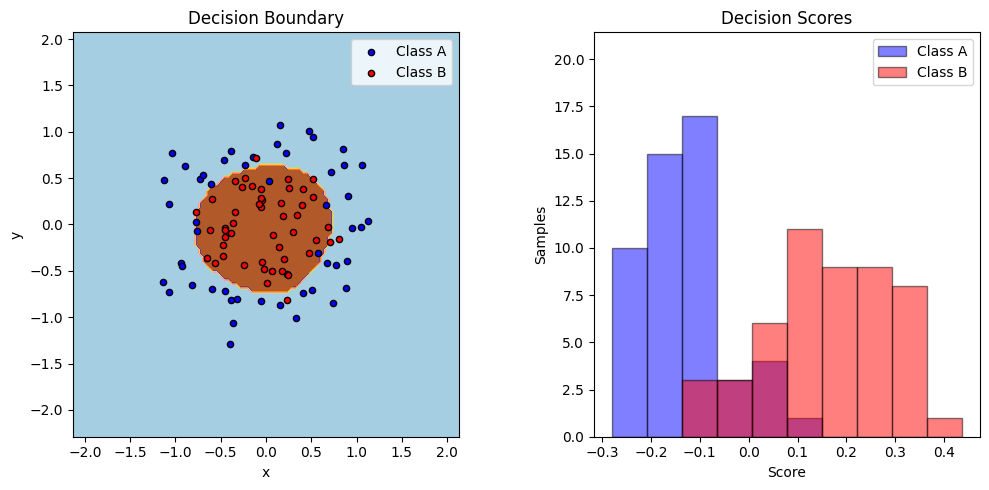

In [14]:
model, params = tuning(X_train, y_train, X_test, y_test, param_grid, X)

## Now, after we found out that svm gives us the best result dealing with our problem, let`s compare ensemble with just one model and explore how it depends from n_estimators

In [15]:
learning_rate = params['classifier__learning_rate']
algorithm = params['classifier__algorithm']
base_estimator = params['classifier__base_estimator']

In [16]:
ada_params = {'learning_rate': learning_rate, 'algorithm': algorithm, 'base_estimator': base_estimator}

In [17]:
adaboost_accuracy = []
adaboost_time = []

svm_accuracy = []
svm_time = []

In [18]:
for num_estimators in range(1, 401):
    
    pipeline_adaboost = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', AdaBoostClassifier(**ada_params, n_estimators = num_estimators))
    ])
        
    pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(probability=True))
    ])
    
    
    
    start_adaboost = time.time()
    
    pipeline_adaboost.fit(X_train, y_train)
    
    stop_adaboost = time.time()
    adaboost_time_ = stop_adaboost - start_adaboost
    adaboost_time.append(adaboost_time_)
    
    
    
    start_svm = time.time()
    
    pipeline_svm.fit(X_train, y_train)
    
    stop_svm = time.time()
    svm_time_ = stop_svm - start_svm
    svm_time.append(svm_time_)

    
    adaboost_preds = pipeline_adaboost.predict(X_test)
    ada_accuracy = accuracy_score(adaboost_preds, y_test)
    adaboost_accuracy.append(ada_accuracy)
    
    svm_preds = pipeline_svm.predict(X_test)
    svc_accuracy = accuracy_score(svm_preds, y_test)
    svm_accuracy.append(svc_accuracy)

In [19]:
num_estimators = np.array(range(1, 401)).reshape(-1, 1)

### Accuracy - n_estimators dependency 

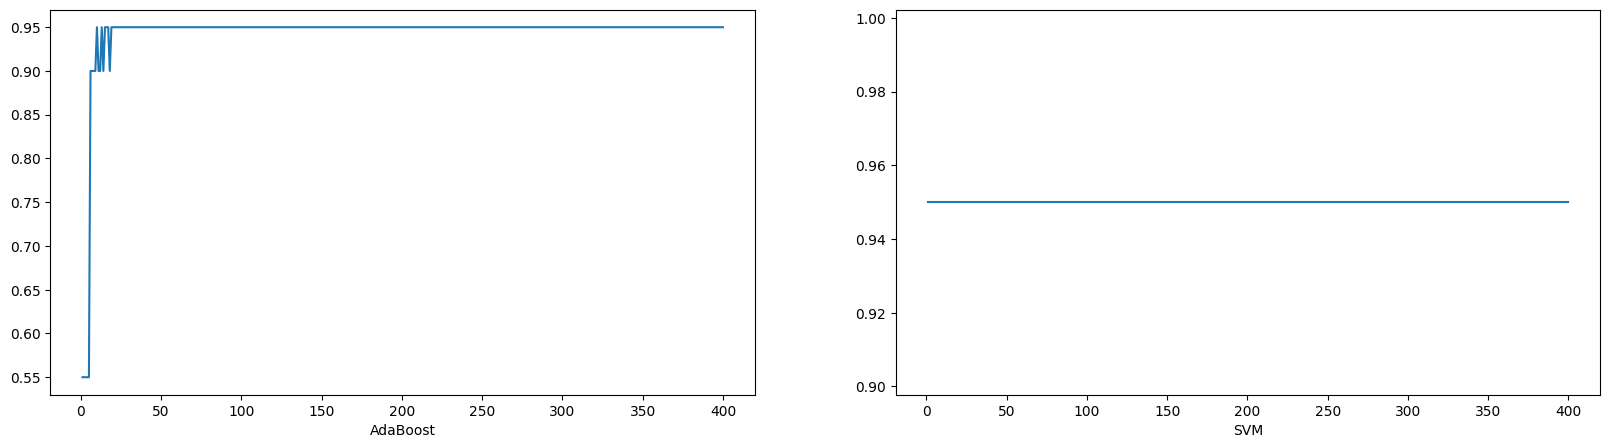

In [20]:
plt.figure(figsize=(20, 5))


plt.subplot(121)
plt.plot(num_estimators, adaboost_accuracy)
plt.xlabel("AdaBoost")
 
plt.subplot(122)
plt.plot(num_estimators, svm_accuracy)
plt.xlabel("SVM")


plt.show()

### Time training - n_estimators dependency 

In [21]:
estimators = np.array(range(1, 401))

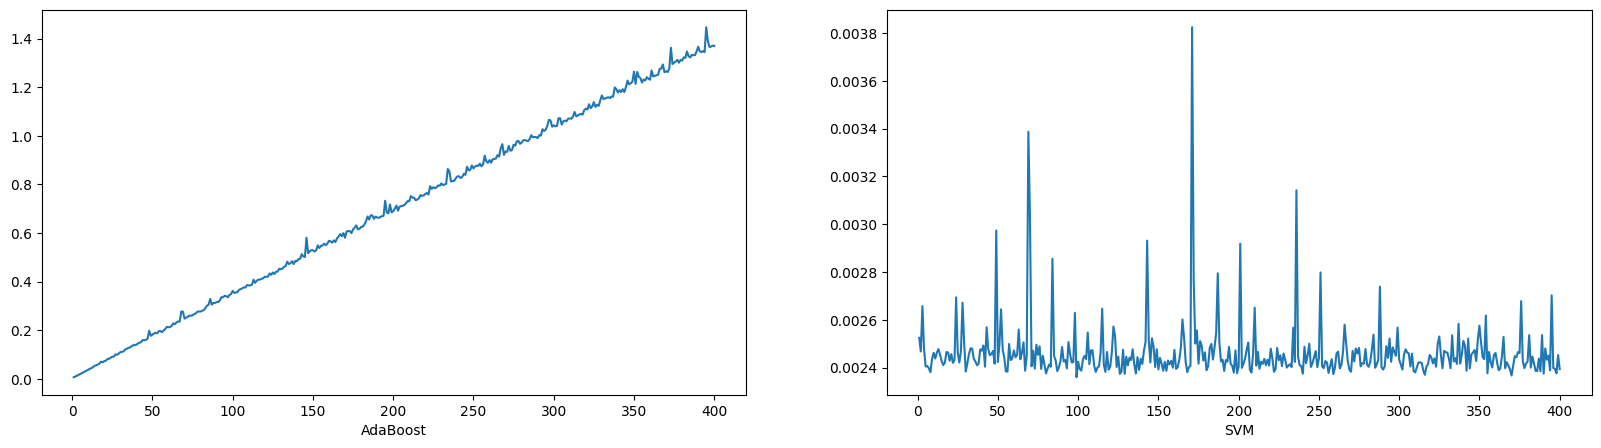

In [22]:
plt.figure(figsize=(20, 5))


plt.subplot(121)
plt.plot(estimators, adaboost_time)
plt.xlabel("AdaBoost")
 
plt.subplot(122)
plt.plot(estimators, svm_time)
plt.xlabel("SVM")


plt.show()